In [1]:
from nn import read_text_file, read_fasta_file,sample_window, one_hot_encode_seqs, sample_seqs
import random
from sklearn.utils import shuffle
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from nn import NeuralNetwork

import matplotlib.pyplot as plt


In [2]:
positive_raw_dataset = read_text_file("data/rap1-lieb-positives.txt")
negative_raw_dataset = read_fasta_file("data/yeast-upstream-1k-negative.fa")
negative_raw_dataset = sample_window(negative_raw_dataset, window_size=17)

pos_dataset = one_hot_encode_seqs(positive_raw_dataset)
neg_dataset = one_hot_encode_seqs(negative_raw_dataset)

pos_labels = [1] * len(pos_dataset)
neg_labels = [0] * len(neg_dataset)

# sequences = np.vstack((pos_dataset, neg_dataset))[:, 2:-2]
sequences = np.vstack((pos_dataset, neg_dataset))

labels = pos_labels + neg_labels


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sequences)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, labels, test_size=0.2, random_state=36)
X_train, y_train = sample_seqs(list(X_train), list(y_train))
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [18]:
# nn_arch = [
#     {'input_dim': 64, 'output_dim': 32, 'activation': 'relu'},
#     {'input_dim': 32, 'output_dim': 10, 'activation': 'sigmoid'}  # Assuming a sigmoid output layer for multi-class classification
# ]
nn_arch = [{'input_dim': 68, 'output_dim': 32, 'activation': 'relu'},
                    {'input_dim': 32, 'output_dim': 16, 'activation': 'sigmoid'},
                    {'input_dim': 16, 'output_dim': 32, 'activation': 'sigmoid'},
                    {'input_dim': 32, 'output_dim': 68, 'activation': 'relu'},
                    {'input_dim': 68, 'output_dim': 1, 'activation': 'sigmoid'}]

# Instantiate the neural network
nn = NeuralNetwork(nn_arch, lr=0.1, seed=57, batch_size=32, epochs=3000, loss_function='binary_cross_entropy')

# Train the neural network
train_loss, val_loss = nn.fit(X_train.T, y_train, X_val.T, y_val)  # Note: .T is used to transpose the matrices to match the expected shape

# Predictions (Optional: evaluate the model's performance)
y_hat_val = nn.predict(X_val.T)


Epoch 1/3000, Training Loss: 0.6937369807105577, Validation Loss: 0.7243568588779548
Epoch 2/3000, Training Loss: 0.6934745797221548, Validation Loss: 0.718952995337338
Epoch 3/3000, Training Loss: 0.693252760476566, Validation Loss: 0.714150774766489
Epoch 4/3000, Training Loss: 0.6930764723884166, Validation Loss: 0.7104913038744013
Epoch 5/3000, Training Loss: 0.6929878586085515, Validation Loss: 0.7074505108678596
Epoch 6/3000, Training Loss: 0.6929244438823138, Validation Loss: 0.7049225108244419
Epoch 7/3000, Training Loss: 0.6928784173684291, Validation Loss: 0.7028094354992881
Epoch 8/3000, Training Loss: 0.6928444484065125, Validation Loss: 0.7010444974100732
Epoch 9/3000, Training Loss: 0.6928189239096231, Validation Loss: 0.6995774964971173
Epoch 10/3000, Training Loss: 0.6927993573872572, Validation Loss: 0.6983476005925839
Epoch 11/3000, Training Loss: 0.6927838616174457, Validation Loss: 0.6973248384146651
Epoch 12/3000, Training Loss: 0.6927712617846853, Validation Loss:

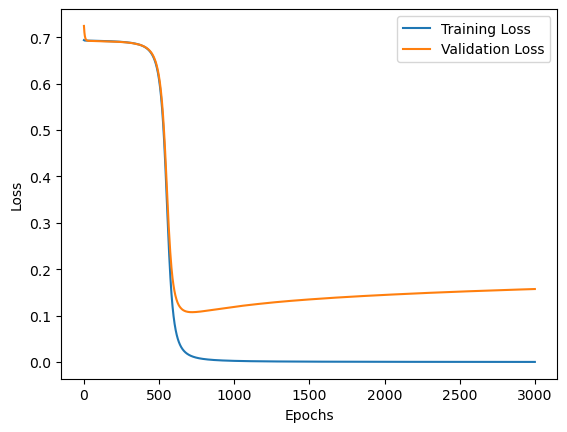

In [19]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
y_hat_val[y_hat_val>0.5] = 1
y_hat_val[y_hat_val<0.5] = 0

final_result = y_hat_val


In [21]:
compare = final_result+y_val
cor = 0
wrong = 0
for i in compare[0]:

    if i ==2:cor+=1
    elif i ==1:wrong+=1

print(cor,wrong)


24 28
